# Two-photon STIRAP Excitation to Rydberg States

The motivation for this is to have ensemble size insensitive quantum gates.  

### Theory
Conditions for STIRAP:  

$|d\theta/dt| << |\sqrt{\Omega_1^2 + \Omega_2^2}|$, where $\theta = \arctan{(\Omega1/\Omega2)}$  
Equivalently, 
$\Omega_{1,2;max} \times t_{tr} >> 1$, for $t_{tr}$ the transfer time.

Each photon must be resonant with its respective transition

Follow the dark state, E = 0.   

Neglecting Decoherence:
* For N atoms, E = 0 state exists only if N even. For system initialized in the dark state, adiabatic evolution requires an even number atoms in $|e>|g>$ subspace at end of the pulses. Only a single excitation to Rydberg is permitted -- iff N is even. 
Finite Decay ($\Gamma$) of intermediate state:
* Atoms that decay into |g> removed from dark state; remaining atoms projected back into dark state (Quantum Zeno effect) untill a single atom in dark state, which fully overlaps the singly-excited Rydberg state. 

For $\Gamma_e > \Omega_1$, singly-excited Rydberg state occurs regardless of ensemble parity $(-1)^N$

### TODO: 

<b> Add to code </b>
 <li> Mixing angle plot </li>
 <li> Dressed state basis eigenenergies plot </li>
 <li> Zeeman shift to each level from bias field </li>
 <li> Compare Gaussian pulses to sinusoidal </li>

<b> Questions/things to investigate:  </b>
 <li> Excitation to Rydberg probability vs Rabi Frequency Ratio </li>
 <li> State trajectory on two Bloch Spheres? </li>
 <li> Multi-atom excitation, effect of Rydberg blockade and </li>
 <li> Sensitivity to dephasing mechanisms, e.g. Gaussian intensity of addressing beams (spatially varying AC Stark shift)
     Doppler shift, Rydberg-Rydberg interaction</li>
     
### From Alex Gill's Thesis  
W-state prep simulation (Fig. 3.2):  
$B/2\pi = $35 MHz  
$\tau_e = 1 ms^{-1}$  
$\tau_r = 38.1\mu s^{-1}$

<b>STIRAP Excitation to Rydberg (Simulations)</b>:

(Fig. 5.14):
* About 0.8 $\mu s^-1$ to max population transfer, insensitive to ensemble size N. 

Comments on discrepancy between simulation and data: 
* Temperature affects unaccounted for, i.e. Doppler
* Variation in blockade strength due to variance in relative atom positions neglected
* Simulation uses "pessimistic" (constant) blockade strength of 20 MHz
* Parity independence due to intermediate state decay may not be good assumption -- check this! Decay rate from $5p_{3/2}$ ~ $2\pi \times 6.6066$ MHz ... should be fine. Something else going on... Forster resonances fuck with parity?

Experimental results of W-State via A,B $\pi$-pulse protocol:  
* Max prob of $N=1$ Fock state: 63.3%, with $\bar N$ = 6 

<b>STIRAP Excitation to Rydberg (Experimental)</b>:  
Protocol, parameters

* OP to $5s_{1/2},F=2$ stretched state
* See Page 55 for general considerations
* Pulse duration < 9 $\mu s$ to maximize atom retention during FORT drop and have time to return excited atom to ground state and blow away
* $\Omega_{780A}/\Omega_{480} \approx 7$  ? in one of the figures
* $\Omega_{1,max} = 12.2$ MHz, $\Omega_{2,max} = 10$ MHz 

Results  
* ~ 57% Maximum single Rydberg excitation overall. $t_{tr}=1.5 \mu s^-1$, Poisson mean $<N> = 1$

Note on experimental detection: 
 * Prepare singly-excited Rydberg state $|\bar r>$, map excitation down to $|\bar 1>$. 
 * Blow away population in $|0>$
 * Measure remaining atoms in FORT to determine how many atoms were excited to $|r>$
 
#### Questions/Comments
 * No N-dependence for STIRAP to W-state? Answer: starts in dark state, adiabatically follow it, end in dark state-- the dark state being followed is not dependent on the atom number, whereas the root N dependence of Rabi Oscillations with blockade comes from the matrix element between ground and superposition states. 
* Interesting question-- what are the matrix elements as functions of time? Obviously these vary with the field amplitudes. Try comparing to two fields constantly on to compare. 
 * Alex Gill simulation incomplete-- no temp dependence, const blockade, etc.

### 3 level STIRAP - auto-generated ODE system

In [2]:
#### set up the simulation - this is the easiest way

rho0 = zeros(6, complex)
rho0[0] = 1 + 0j # population starts in ground state

w = 10
dt = 20
t_exp = 120

t = symbols('t') # the time variable
Omax = 2*pi*.4 # this width and amplitude give A = 2*pi
O2 = Omax*e**(-((t+dt/2)/w)**2/2)
O1 = Omax* e**(-((t-dt/2)/w)**2/2)

D1 = 0.1*Omax # (finite to prevent 1/0 error in D2)
D2 = -D1 

H = hbar*Matrix([[0,   O1/2,  0],
                 [O1/2, -D1,  O2/2],
                 [0,   O2/2, -(D1+D2)]])

sim = AtomSim(rho0, t_exp, hamiltonian=H, 
              fields=[O1, O2])

Run time: 0.12659549713134766


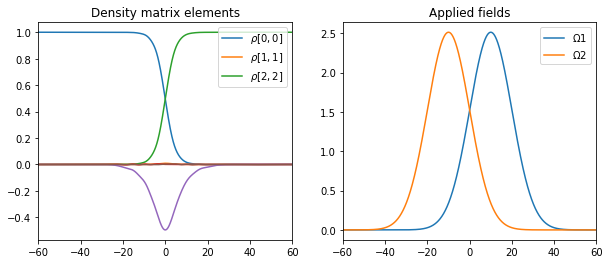

In [4]:
t0 = time.time()
rho, t = sim.runsim(tcentered=True)
print(f"Run time: {time.time() - t0}")
kwargs = {'figsize':(10,4)}
fig, axes = sim.plots(show=['populations','fields'], coherences=True,
                      kwargs=kwargs)